# Lead Scoring Case Study

To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

# Step 1: Importing and Merging Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing all datasets
lead_data=pd.read_csv(r"C:\Users\Vandanavardhan\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2: Inspecting the Dataframe

In [4]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 3: Data Preparation
Converting some binary variables (Yes/No) to 0/1

In [7]:
# converting yes/no to 1/0
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [8]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [9]:
# Replacing Select values with nan values
lead_data = lead_data.replace('Select', np.nan)

In [10]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [11]:
lead_data.shape

(9240, 37)

In [12]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# the percentage of missing values
round((lead_data.isnull().sum()/len(lead_data)*100),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [14]:
# Removing columns which contains more than 30% of Missing Values
lead_data=lead_data.drop(lead_data.columns[round((lead_data.isnull().sum()/len(lead_data))*100)>=30],1)
round((lead_data.isnull().sum()/len(lead_data)*100),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine  

In [15]:
#now checking for the importance of other high missing value columns and drop them if unncessary


In [16]:
lead_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [17]:
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [18]:
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [20]:
#drop the columns of being less important and impute the mode values to  the necessary columns
lead_data=lead_data.drop(['What matters most to you in choosing a course','Prospect ID'],axis=1)


In [21]:
lead_data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [22]:
#imputing the mode values 
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')
lead_data['Lead Source']=lead_data['Lead Source'].replace(np.nan,'Google')


In [23]:
# Removing NaN in TotalVisits rows
lead_data =lead_data[~np.isnan(lead_data['TotalVisits'])]
lead_data =lead_data[~np.isnan(lead_data['Page Views Per Visit'])]


In [24]:
lead_data.isnull().sum()

Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [25]:
lead_data.shape

(9103, 25)

In [26]:
# To familiarize all the categorical values
for column in lead_data:
    print(lead_data[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

579533    1
630083    1
630013    1
630039    1
630041    1
         ..
602411    1
602406    1
602404    1
602403    1
660737    1
Name: Lead Number, Length: 9103, dtype: int64
----------------------------------------------------------------------------------------
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone         

 Dropping all the columns which do not capture any variance

In [27]:
lead_data = lead_data.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations',
                            'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                            'Get updates on DM Content','I agree to pay the amount through cheque','What is your current occupation'],axis=1)


lead_data.shape

(9103, 12)

In [28]:
lead_data=lead_data.drop(['Country'],axis=1)

In [29]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1=pd.get_dummies(lead_data[['Lead Origin','Last Activity','Lead Source','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead_data=pd.concat([lead_data, dummy1], axis=1)

In [30]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,...,0,0,1,0,0,0,0,0,0,0


# Dropping the repeated variables

In [31]:
# We have created dummies for the below variables, so we can drop them
lead_data=lead_data.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity'],1)

In [32]:
lead_data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
lead_data.shape

(9103, 61)

In [34]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Number                                         9103 non-null   int64  
 1   Do Not Email                                        9103 non-null   int64  
 2   Converted                                           9103 non-null   int64  
 3   TotalVisits                                         9103 non-null   float64
 4   Total Time Spent on Website                         9103 non-null   int64  
 5   Page Views Per Visit                                9103 non-null   float64
 6   A free copy of Mastering The Interview              9103 non-null   int64  
 7   Lead Origin_Landing Page Submission                 9103 non-null   uint8  
 8   Lead Origin_Lead Add Form                           9103 non-null   uint8  
 9

# Checking for Outliers

In [35]:
# Checking for outliers in the continuous variables
num_lead_data=lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [36]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000


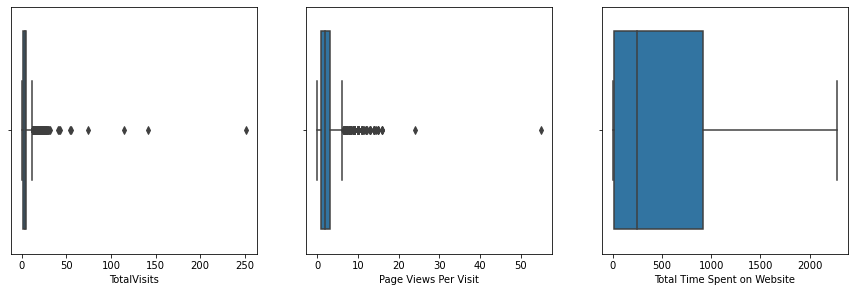

In [37]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(lead_data['TotalVisits'])
plt.subplot(2,3,2)
sns.boxplot(lead_data['Page Views Per Visit'])
plt.subplot(2,3,3)
sns.boxplot(lead_data['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

In [38]:
Q1 = lead_data.TotalVisits.quantile(0.25)
Q3 = lead_data.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
lead_data = lead_data[(lead_data.TotalVisits >= Q1 - 1.5*IQR) & (lead_data.TotalVisits <= Q3 + 1.5*IQR)]


# outlier treatment for Page Views Per Visit
Q1 = lead_data['Page Views Per Visit'].quantile(0.25)
Q3 = lead_data['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1

lead_data = lead_data[(lead_data['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead_data['Page Views Per Visit'] <= Q3 + 1.5*IQR)]


In [39]:
#Dropping NA values
lead_data.dropna(inplace=True)
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8542 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Number                                         8542 non-null   int64  
 1   Do Not Email                                        8542 non-null   int64  
 2   Converted                                           8542 non-null   int64  
 3   TotalVisits                                         8542 non-null   float64
 4   Total Time Spent on Website                         8542 non-null   int64  
 5   Page Views Per Visit                                8542 non-null   float64
 6   A free copy of Mastering The Interview              8542 non-null   int64  
 7   Lead Origin_Landing Page Submission                 8542 non-null   uint8  
 8   Lead Origin_Lead Add Form                           8542 non-null   uint8  
 9

In [40]:
num_lead_data=lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_lead_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8542.000000,8542.000000,8542.000000
mean,2.810700,469.778740,2.076613
std,2.435562,542.851967,1.654045
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,3.000000,233.000000,2.000000
75%,4.000000,888.750000,3.000000
90%,6.000000,1366.000000,4.000000
95%,7.000000,1551.000000,5.000000
99%,10.000000,1838.180000,6.000000


In [41]:
lead_data.describe()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,...,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000
mean,616987.801452,0.077382,0.378366,2.810700,469.778740,2.076613,0.300866,0.521306,0.070592,0.003512,...,0.000117,0.001288,0.365488,0.020487,0.028916,0.000117,0.239874,0.003512,0.005268,0.000117
std,23289.217331,0.267213,0.485008,2.435562,542.851967,1.654045,0.458662,0.499575,0.256158,0.059162,...,0.010820,0.035864,0.481595,0.141667,0.167580,0.010820,0.427031,0.059162,0.072394,0.010820
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596397.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615427.000000,0.000000,0.000000,3.000000,233.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637042.750000,0.000000,1.000000,4.000000,888.750000,3.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,1.000000,11.000000,2272.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 4: Test-Train Split¶

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Putting feature variable to X
X = lead_data.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 5: Feature Scaling¶

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1384,0,0.886460,-0.337463,1.783827,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019,0,-1.145025,-0.860893,-1.254234,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3514,0,-1.145025,-0.860893,-1.254234,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5930,0,0.480163,0.301267,1.176215,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1409,0,-0.332431,-0.857232,-0.039010,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
### Checking the Converted Rate
converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

37.83657223132756

we have almost 38% converted rate

# Step 6: Looking at Correlations

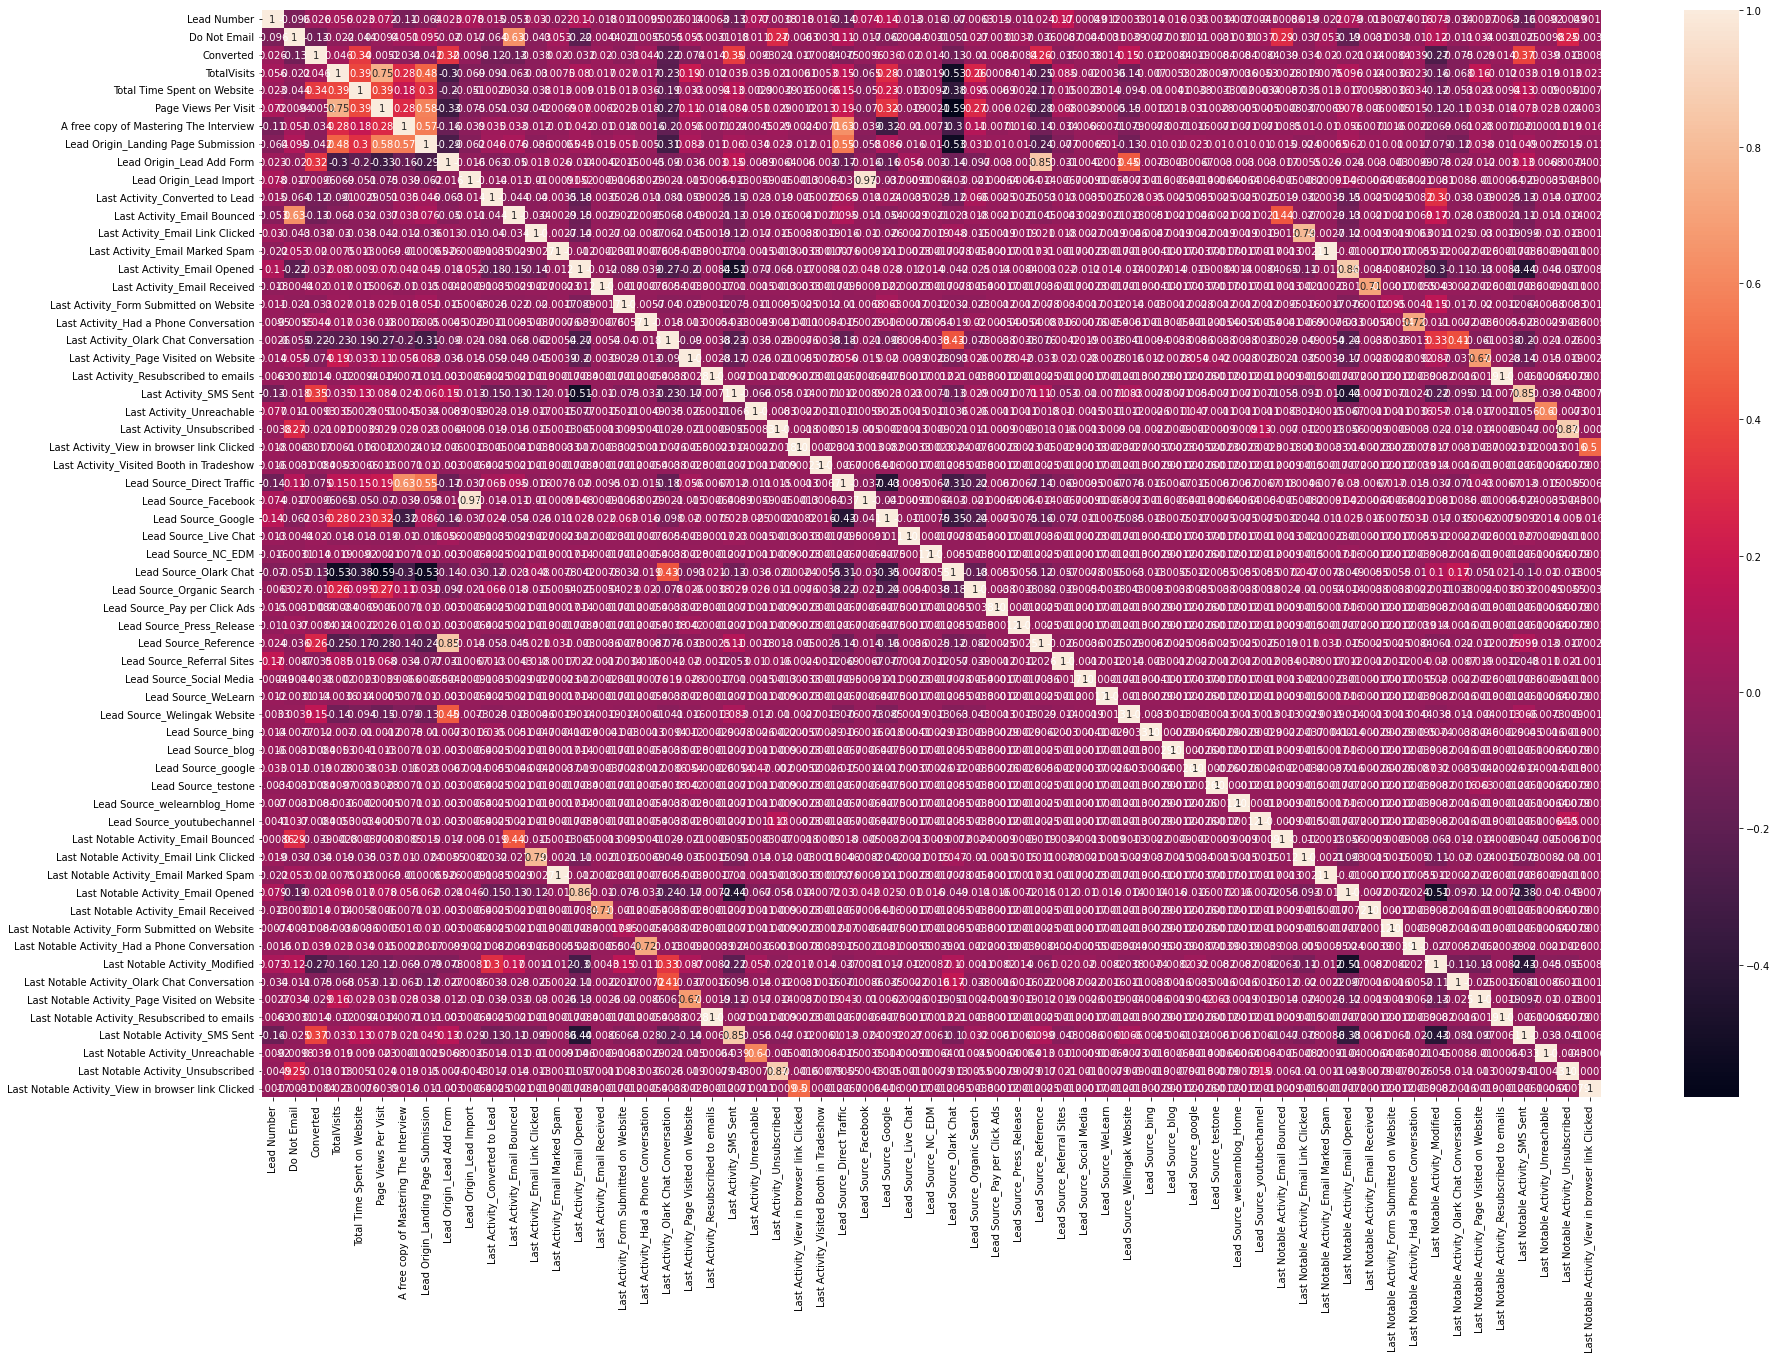

In [49]:
# heatmap
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(lead_data.corr(),annot=True)
plt.show()


as there are more no.of variables lets,lets first do RFE  to drop the unncessary variables


# Step 7: Model Building¶

Running Your First Training Model

In [50]:
import statsmodels.api as sm

In [51]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5925
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.1
Date:                Tue, 18 Oct 2022   Deviance:                       5170.1
Time:                        11:32:38   Pearson chi2:                 6.06e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 20.5547   7.96e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                          -1.4489      0.223     -6.487      0.000      -1.887      -1.011
TotalVisits                                            0.2444      0.054      4.515      0.000       0.138       0.350
Total Time Spent on Website                            1.0870      0.041     26.647      0.000       1.007       1.167
Page Views Per Visit                                  -0.1928      0.062     -3.122      0.002      -0.314      -0.072
A free copy of Mastering The Interview                -0.0406      0.109     -0.371      0.710      -0.255       0.174
Lead Origin_Landing Page Submission                   -0.0534      0.110     -0.485      0.628      -0.269       0.163
Lead Origin_Lead Add Form                              3.6651      0.770      4.759      0.000       2.156       5.174
Lead Origin_Lead Import                              -21.2400   6.43e+04     -0.000      1.000   -1.26e+05    1.26e+05
Last Activity_Converted to Lead                      -24.8060   4.07e+04     -0.001      1.000   -7.97e+04    7.97e+04
Last Activity_Email Bounced                          -25.1036   4.07e+04     -0.001      1.000   -7.97e+04    7.97e+04
Last Activity_Email Link Clicked                     -24.5930   4.07e+04     -0.001      1.000   -7.97e+04    7.97e+04
Last Activity_Email Marked Spam                        0.1139   4.99e+04   2.28e-06      1.000   -9.78e+04    9.78e+04
Last Activity_Email Opened                           -23.7234   4.07e+04     -0.001      1.000   -7.97e+04    7.97e+04
Last Activity_Email Received                           0.5000   5.76e+04   8.69e-06      1.000   -1.13e+05    1.13e+05
Last Activity_Form Submitted on Website              -24.2673   4.07e+04     -0.001      1.000   -7.97e+04    7.97e+04
Last Activity_Had a Phone Conversation               -22.4588   4.07e+04     -0.001      1.000   -7.97e+04    7.97e+04
Last Activity_Olark Chat Conversation                -25.4266   4.07e+04     -0.001      1.000   -7.97e+04    7.97e+04
Last Activity_Page Visited on Website                -24.1914   4.07e+04     -0.001      1.000   -7.97e+04    7.97e+04
Last Activity_Resubscribed to emails                   1.8131   1.15e+05   1.58e-05      1.000   -2.25e+05    2.25e+05
Last Activity_SMS Sent                               -23.5532   4.07e+04     -0.001      1.000   -7.97e+04    7.97e+04
Last Activity_Unreachable                            -24.4552   4.07e+04     -0.001      1.000   -7.97e+04    7.97e+04
Last Activity_Unsubscribed                           -23.7808   4.07e+04     -0.001      1.000   -7.97e+04  

# Step 8: Feature Selection Using RFE

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [54]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False,  True,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False])

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('A free copy of Mastering The Interview', False, 42),
 ('Lead Origin_Landing Page Submission', False, 40),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Email Marked Spam', False, 21),
 ('Last Activity_Email Opened', False, 29),
 ('Last Activity_Email Received', False, 22),
 ('Last Activity_Form Submitted on Website', False, 10),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_Resubscribed to emails', False, 16),
 ('Last Activity_SMS Sent', False, 28),
 ('Last Activity_Unreachable', False, 12),
 ('Last Activity_Unsubscribed', False

In [56]:
col = X_train.columns[rfe.support_]

In [57]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'L

In [58]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Lead Source_Direct Traffic',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

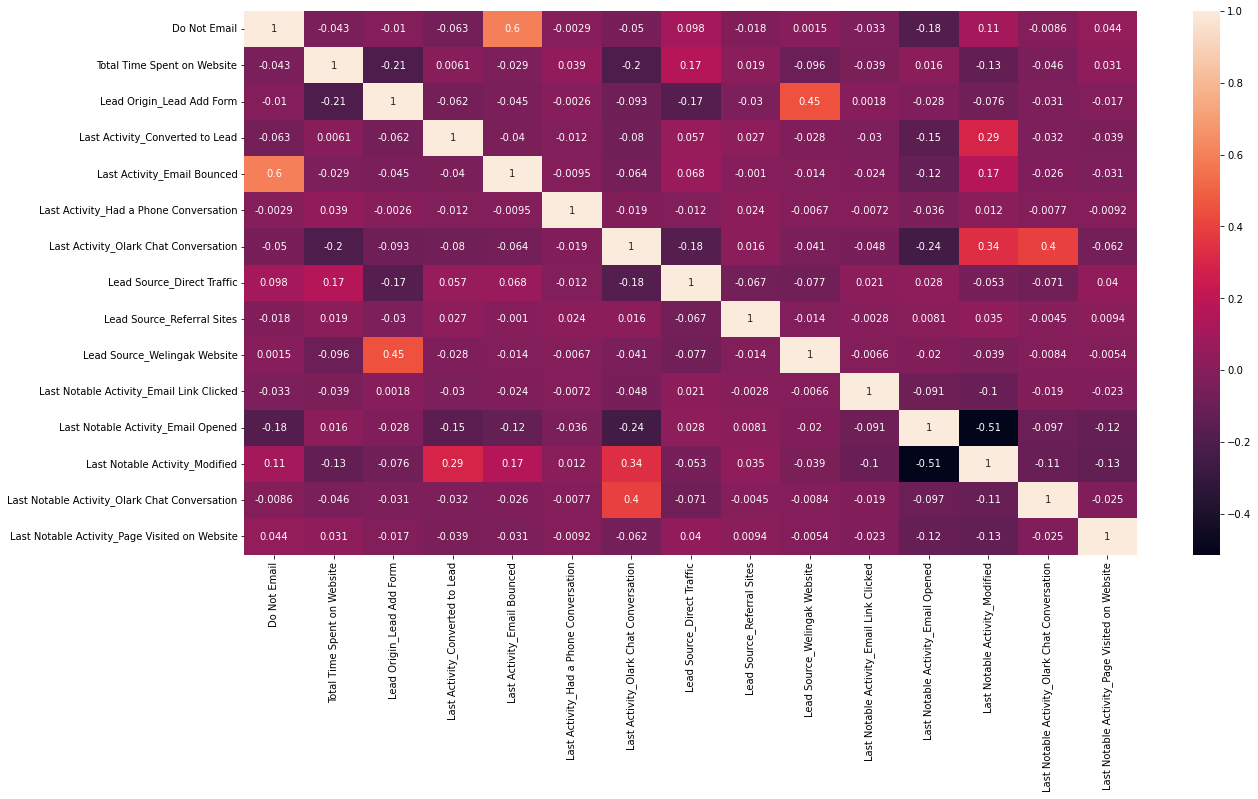

In [59]:
#heatmap
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot=True)
plt.show()

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5963
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.2
Date:                Tue, 18 Oct 2022   Deviance:                       5324.3
Time:                        11:32:41   Pearson chi2:                 5.99e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.7922      0.072     10.936      0.000       0.650       0.934
Do Not Email                                     -1.4892      0.195     -7.648      0.000      -1.871      -1.108
Total Time Spent on Website                       0.9421      0.036     26.484      0.000       0.872       1.012
Lead Origin_Lead Add Form                         3.7306      0.220     16.940      0.000       3.299       4.162
Last Activity_Converted to Lead                  -1.1194      0.209     -5.364      0.000      -1.528      -0.710
Last Activity_Email Bounced                      -1.3771      0.426     -3.236      0.001      -2.211      -0.543
Last Activity_Had a Phone Conversation            1.5567      0.778      2.002      0.045       0.033       3.081
Last Activity_Olark Chat Conversation            -1.2216      0.194     -6.281      0.000      -1.603      -0.840
Lead Source_Direct Traffic                       -0.5134      0.077     -6.644      0.000      -0.665      -0.362
Lead Source_Referral Sites                       -0.5474      0.337     -1.626      0.104      -1.207       0.113
Lead Source_Welingak Website                      2.1083      1.035      2.037      0.042       0.079       4.137
Last Notable Activity_Email Link Clicked         -2.0780      0.284     -7.327      0.000      -2.634      -1.522
Last Notable Activity_Email Opened               -1.4778      0.087    -16.891      0.000      -1.649      -1.306
Last Notable Activity_Modified                   -1.7734      0.099    -17.843      0.000      -1.968      -1.579
Last Notable Activity_Olark Chat Conversation    -1.5941      0.378     -4.219      0.000      -2.335      -0.854
Last Notable Activity_Page Visited on Website    -1.8226      0.206     -8.840      0.000      -2.227      -1.419
=================================================================================================================
"""

In [61]:
col=col.drop('Lead Source_Referral Sites',1)

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.6
Date:                Tue, 18 Oct 2022   Deviance:                       5327.1
Time:                        11:32:41   Pearson chi2:                 6.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.7872      0.072     10.880      0.000       0.645       0.929
Do Not Email                                     -1.4867      0.195     -7.633      0.000      -1.868      -1.105
Total Time Spent on Website                       0.9407      0.036     26.465      0.000       0.871       1.010
Lead Origin_Lead Add Form                         3.7383      0.220     16.977      0.000       3.307       4.170
Last Activity_Converted to Lead                  -1.1266      0.209     -5.399      0.000      -1.536      -0.718
Last Activity_Email Bounced                      -1.3754      0.426     -3.232      0.001      -2.209      -0.541
Last Activity_Had a Phone Conversation            1.5322      0.782      1.960      0.050      -0.000       3.065
Last Activity_Olark Chat Conversation            -1.2286      0.195     -6.315      0.000      -1.610      -0.847
Lead Source_Direct Traffic                       -0.5042      0.077     -6.541      0.000      -0.655      -0.353
Lead Source_Welingak Website                      2.1077      1.035      2.036      0.042       0.079       4.137
Last Notable Activity_Email Link Clicked         -2.0824      0.283     -7.347      0.000      -2.638      -1.527
Last Notable Activity_Email Opened               -1.4827      0.087    -16.960      0.000      -1.654      -1.311
Last Notable Activity_Modified                   -1.7786      0.099    -17.908      0.000      -1.973      -1.584
Last Notable Activity_Olark Chat Conversation    -1.5908      0.378     -4.210      0.000      -2.331      -0.850
Last Notable Activity_Page Visited on Website    -1.8306      0.206     -8.880      0.000      -2.235      -1.427
=================================================================================================================
"""

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.98
6,Last Activity_Olark Chat Conversation,1.86
0,Do Not Email,1.70
4,Last Activity_Email Bounced,1.66
2,Lead Origin_Lead Add Form,1.37
7,Lead Source_Direct Traffic,1.36
12,Last Notable Activity_Olark Chat Conversation,1.33
8,Lead Source_Welingak Website,1.28
3,Last Activity_Converted to Lead,1.25
10,Last Notable Activity_Email Opened,1.16


In [64]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1384    0.266416
2019    0.903175
3514    0.494355
5930    0.148203
1409    0.090965
1484    0.044246
4711    0.286732
9061    0.684124
3233    0.784020
7797    0.055099
dtype: float64

In [65]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26641596, 0.90317511, 0.49435537, 0.14820295, 0.09096507,
       0.04424588, 0.28673153, 0.68412421, 0.78401952, 0.05509874])

In [66]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convertion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Convertion_Prob,Lead Number
0,0,0.266416,1384
1,1,0.903175,2019
2,1,0.494355,3514
3,0,0.148203,5930
4,0,0.090965,1409


In [67]:
y_train_pred_final['predicted'] = y_train_pred_final.Convertion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead Score'] = y_train_pred_final.Convertion_Prob.map(lambda x: round(x*100,0))
# Let's see the head
y_train_pred_final.head()

,Converted,Convertion_Prob,Lead Number,predicted,Lead Score
0,0,0.266416,1384,0,27.0
1,1,0.903175,2019,1,90.0
2,1,0.494355,3514,0,49.0
3,0,0.148203,5930,0,15.0
4,0,0.090965,1409,0,9.0


In [68]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3196  491]
 [ 800 1492]]


In [69]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7840776049506607


# Metrics beyond simply accuracy

In [70]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [71]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.6509598603839442

In [72]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity


0.8668294005966911

In [73]:
# Calculate false postive rate - predicting conversion when customer have not converted
FPR=FP/ float(TN+FP)
FPR

0.13317059940330891

In [74]:
# positive predictive value 
print (TP / float(TP+FP))

0.7523953605648008


In [75]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7997997997997998


# Step 9: Plotting the ROC Curve

In [76]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convertion_Prob, drop_intermediate = False )

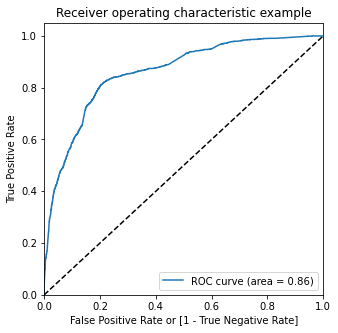

In [78]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convertion_Prob)

# Step 10: Finding Optimal Cutoff Point


In [79]:
 #Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convertion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convertion_Prob,Lead Number,predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.266416,1384,0,27.0,1,1,1,0,0,0,0,0,0,0
1,1,0.903175,2019,1,90.0,1,1,1,1,1,1,1,1,1,1
2,1,0.494355,3514,0,49.0,1,1,1,1,1,0,0,0,0,0
3,0,0.148203,5930,0,15.0,1,1,0,0,0,0,0,0,0,0
4,0,0.090965,1409,0,9.0,1,0,0,0,0,0,0,0,0,0


In [80]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383342  1.000000  0.000000
0.1   0.1  0.555611  0.982984  0.289938
0.2   0.2  0.709316  0.874782  0.606455
0.3   0.3  0.792273  0.831152  0.768104
0.4   0.4  0.801137  0.781414  0.813398
0.5   0.5  0.784078  0.650960  0.866829
0.6   0.6  0.775380  0.548866  0.916192
0.7   0.7  0.759492  0.455497  0.948468
0.8   0.8  0.736578  0.360820  0.970165
0.9   0.9  0.691085  0.216405  0.986168


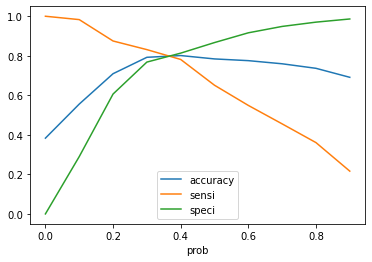

In [81]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Taking value 0.35 as the Final Cutoff

In [82]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convertion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Convertion_Prob,Lead Number,predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.266416,1384,0,27.0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.903175,2019,1,90.0,1,1,1,1,1,1,1,1,1,1,1
2,1,0.494355,3514,0,49.0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.148203,5930,0,15.0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.090965,1409,0,9.0,1,0,0,0,0,0,0,0,0,0,0


In [83]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8021408262251213

In [84]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2933,  754],
       [ 429, 1863]], dtype=int64)

In [85]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [86]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity


0.81282722513089

In [87]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.795497694602658

In [88]:
# Calculate false postive rate 

FPR = FP/ float(TN+FP)
FPR

0.20450230539734202

In [89]:
# Positive predictive value 
print(TP / float(TP+FP))


0.7118838364539549


In [90]:
# Negative predictive value
print( TN / float(TN+ FN))


0.8723973825104104


# Precision and recall tradeoff

our model achieves overall 0.80 sensitivity.

It means that 80 percent time our model is able to predict (actually)converted as (predicited)converted.

This nodel is good enough for analysis.

In [92]:
from sklearn.metrics import precision_recall_curve

In [93]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 5974    0
 5975    0
 5976    0
 5977    0
 5978    1
 Name: Converted, Length: 5979, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 5974    0
 5975    0
 5976    0
 5977    0
 5978    1
 Name: predicted, Length: 5979, dtype: int64)

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convertion_Prob)

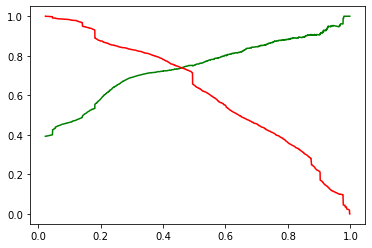

In [96]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 11: Making predictions on the test set

In [97]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                        'Total Time Spent on Website','Page Views Per Visit']])

In [98]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
7191,0,1.165108,0,0,0,0,0,1,0,0,1,0,0,0
1008,0,-0.582706,0,0,0,0,0,0,0,0,1,0,0,0
3494,0,1.203542,0,0,0,0,0,1,0,0,0,0,0,0
3298,0,0.021250,0,0,0,0,0,1,0,0,0,0,0,0
5646,0,-0.860893,1,0,0,0,0,0,0,0,1,0,0,0


In [99]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set


In [100]:
y_test_pred = res.predict(X_test_sm)


In [101]:
y_test_pred[:10]

7191    0.474110
1008    0.223815
3494    0.804580
3298    0.575187
5646    0.903175
4485    0.843398
5577    0.494355
4165    0.684865
4539    0.494355
5568    0.177371
dtype: float64

In [102]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [103]:
# Let's see the head
y_pred_1.head()

,0
7191,0.474110
1008,0.223815
3494,0.804580
3298,0.575187
5646,0.903175


In [104]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [105]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [106]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,7191,0.474110
1,1,1008,0.223815
2,1,3494,0.804580
3,1,3298,0.575187
4,1,5646,0.903175


In [109]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [110]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conversion_Prob'], axis=1)

In [111]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob
0,7191,0,0.474110
1,1008,1,0.223815
2,3494,1,0.804580
3,3298,1,0.575187
4,5646,1,0.903175


In [112]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [113]:
y_pred_final.head()


,Lead Number,Converted,Conversion_Prob,final_predicted
0,7191,0,0.474110,1
1,1008,1,0.223815,0
2,3494,1,0.804580,1
3,3298,1,0.575187,1
4,5646,1,0.903175,1


In [115]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7951619196254389

In [117]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2


array([[1312,  311],
       [ 214,  726]], dtype=int64)

In [118]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Calculate Precision

TP/(TP+FP)

0.7000964320154291

In [122]:
# Calculate Recall

TP/(TP+FN)

0.7723404255319148

In [119]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7723404255319148

In [120]:
# Let us calculate specificity
TN / float(TN+FP)

0.8083795440542206

In [91]:
print(res.params)

const                                            0.787221
Do Not Email                                    -1.486747
Total Time Spent on Website                      0.940652
Lead Origin_Lead Add Form                        3.738261
Last Activity_Converted to Lead                 -1.126636
Last Activity_Email Bounced                     -1.375432
Last Activity_Had a Phone Conversation           1.532165
Last Activity_Olark Chat Conversation           -1.228623
Lead Source_Direct Traffic                      -0.504165
Lead Source_Welingak Website                     2.107670
Last Notable Activity_Email Link Clicked        -2.082377
Last Notable Activity_Email Opened              -1.482669
Last Notable Activity_Modified                  -1.778606
Last Notable Activity_Olark Chat Conversation   -1.590751
Last Notable Activity_Page Visited on Website   -1.830649
dtype: float64


# Conclusion

The main features from the Original Dataset that are  important in Evaluating the lead Conversion are:

    1.Do Not Email
    
    2.Total Time Spent on Website 
    
    as all the remaining features are derived ones,these 2 are to be considered the important variables